<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/02_pytorch_classification_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02. PyTorch Classification Exercises

The following is a solution for 02 Exercises.
## Resources
* These exercises are based on [notebook 02 of the learn PyTorch course](https://www.learnpytorch.io/02_pytorch_classification/).
* You can see one form of [solutions on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions) (but try the exercises below yourself first!).

In [2]:
# Import torch
import torch

# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

# Setup random seed
RANDOM_SEED = 42

## 1. Make a binary classification dataset with Scikit-Learn's [`make_moons()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) function.
  * For consistency, the dataset should have 1000 samples and a `random_state=42`.
  * Turn the data into PyTorch tensors.
  * Split the data into training and test sets using `train_test_split` with 80% training and 20% testing.

In [3]:
# Create a dataset with Scikit-Learn's make_moons()
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=1000, shuffle=True, noise=0.05, random_state=42)
X[0]

array([-0.02137124,  0.40618608])

In [4]:
# Turn data into a DataFrame
import pandas as pd
df = pd.DataFrame({"X0":X[:,0],
                   "X1":X[:,1],
                   "y":y})
df.head()

,X0,X1,y
0,-0.021371,0.406186,1
1,0.976700,-0.458323,1
2,0.904059,-0.376520,1
3,0.377363,-0.397037,1
4,-0.841926,0.530587,0


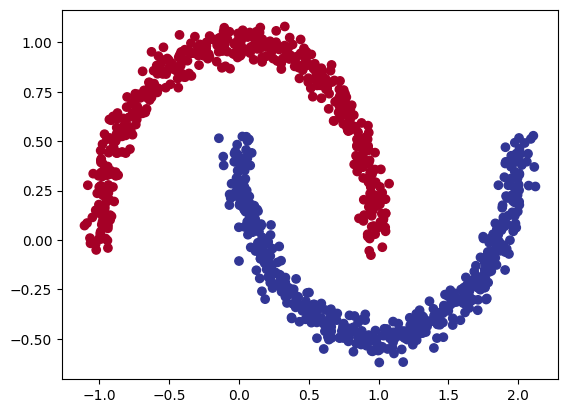

In [5]:
# Visualize the data on a scatter plot
import matplotlib.pyplot as plt
plt.scatter(df.X0,df.X1,c=y,cmap=plt.cm.RdYlBu);

In [6]:
type(X)

numpy.ndarray

In [7]:
# Turn data into tensors of dtype float
X = torch.tensor(X, dtype=torch.float)
y = torch.tensor(y, dtype=torch.float)

# Split the data into train and test sets (80% train, 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
len(X_train),len(X_test),len(y_train),len(y_test)

(800, 200, 800, 200)

## 2. Build a model by subclassing `nn.Module` that incorporates non-linear activation functions and is capable of fitting the data you created in 1.
  * Feel free to use any combination of PyTorch layers (linear and non-linear) you want.

In [9]:
import torch
from torch import nn

# Inherit from nn.Module to make a model capable of fitting the mooon data
class MoonModelV0(nn.Module):
    ## Your code here ##
    def __init__(self, input_features, output_features, hidden_units):
      super().__init__()
      self.layer1 = nn.Linear(in_features=input_features, out_features=hidden_units)
      self.layer2 = nn.Linear(in_features=hidden_units, out_features=hidden_units)
      self.layer3 = nn.Linear(in_features=hidden_units, out_features=output_features)
      self.relu = nn.ReLU()

    def forward(self, x):
        ## Your code here ##
        return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))

# Instantiate the model
## Your code here ##
model = MoonModelV0(input_features=2,
                      output_features=1,
                      hidden_units=10).to(device)
model

MoonModelV0(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

## 3. Setup a binary classification compatible loss function and optimizer to use when training the model built in 2.

In [10]:
# Setup loss function
loss_fn = nn.BCEWithLogitsLoss()
# Setup optimizer to optimize model's parameters
optimizer = torch.optim.SGD(params=model.parameters(),
                            lr=0.1)

## 4. Create a training and testing loop to fit the model you created in 2 to the data you created in 1.
  * Do a forward pass of the model to see what's coming out in the form of logits, prediction probabilities and labels.
  * To measure model accuray, you can create your own accuracy function or use the accuracy function in [TorchMetrics](https://torchmetrics.readthedocs.io/en/latest/).
  * Train the model for long enough for it to reach over 96% accuracy.
  * The training loop should output progress every 10 epochs of the model's training and test set loss and accuracy.

In [11]:
# What's coming out of our model?
y_logits = model(X_test.to(device))
# logits (raw outputs of model)
print("Logits:",y_logits)
## Your code here ##
y_pred_probs = torch.sigmoid(y_logits)
# Prediction probabilities
print("Pred probs:",y_pred_probs)
## Your code here ##
y_pred = torch.round(y_pred_probs).squeeze()
# Prediction labels
print("Pred labels:",y_pred)
## Your code here ##

Logits: tensor([[0.2179],
        [0.1880],
        [0.1853],
        [0.1674],
        [0.1736],
        [0.1646],
        [0.2042],
        [0.2053],
        [0.1848],
        [0.1914],
        [0.1767],
        [0.2204],
        [0.2061],
        [0.1783],
        [0.1670],
        [0.1430],
        [0.2421],
        [0.1686],
        [0.2073],
        [0.1662],
        [0.1849],
        [0.2270],
        [0.2041],
        [0.1606],
        [0.2051],
        [0.2115],
        [0.1595],
        [0.1924],
        [0.1671],
        [0.1804],
        [0.2384],
        [0.2019],
        [0.1850],
        [0.1741],
        [0.1698],
        [0.2365],
        [0.2291],
        [0.1850],
        [0.1728],
        [0.1804],
        [0.2043],
        [0.1913],
        [0.2439],
        [0.1521],
        [0.1784],
        [0.2427],
        [0.1520],
        [0.1758],
        [0.2371],
        [0.1662],
        [0.1773],
        [0.1706],
        [0.1833],
        [0.1488],
        [0.2211],
  

In [13]:
# Let's calculuate the accuracy using accuracy from TorchMetrics
!pip -q install torchmetrics # Colab doesn't come with torchmetrics
from torchmetrics import Accuracy
acc_fn = Accuracy(task="multiclass", num_classes=2).to(device) # send accuracy function to device
acc_fn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 7.3 MB/s eta 0:00:00


MulticlassAccuracy()

In [15]:
## TODO: Uncomment this to set the seed
torch.manual_seed(42)

# Setup epochs
epochs = 1000

# Send data to the device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Loop through the data
for epoch in range(epochs):
  ### Training
  model.train()

  # 1. Forward pass (logits output)
  y_logits = model(X_train).squeeze()
  # Turn logits into prediction probabilities
  y_pred_probs = torch.sigmoid(y_logits)

  # Turn prediction probabilities into prediction labels
  y_pred = torch.round(y_pred_probs)

  # 2. Calculaute the loss
  loss = loss_fn(y_logits, y_train) # loss = compare model raw outputs to desired model outputs

  # Calculate the accuracy
  acc = acc_fn(y_pred, y_train.int()) # the accuracy function needs to compare pred labels (not logits) with actual labels

  # 3. Zero the gradients
  optimizer.zero_grad()

  # 4. Loss backward (perform backpropagation) - https://brilliant.org/wiki/backpropagation/#:~:text=Backpropagation%2C%20short%20for%20%22backward%20propagation,to%20the%20neural%20network's%20weights.
  loss.backward()
  # 5. Step the optimizer (gradient descent) - https://towardsdatascience.com/gradient-descent-algorithm-a-deep-dive-cf04e8115f21#:~:text=Gradient%20descent%20(GD)%20is%20an,e.g.%20in%20a%20linear%20regression)
  optimizer.step()

  ### Testing
  model.eval()
  with torch.inference_mode():
    # 1. Forward pass (to get the logits)
    test_logits = model(X_test).squeeze()
    # Turn the test logits into prediction labels
    test_pred = torch.round(torch.sigmoid(test_logits))
    # 2. Caculate the test loss/acc
    test_loss = loss_fn(test_logits, y_test)
    test_acc = acc_fn(test_pred, y_test.int())

  # Print out what's happening every 100 epochs
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.2f} Acc: {acc:.2f} | Test loss: {test_loss:.2f} Test acc: {test_acc:.2f}")


Epoch: 0 | Loss: 0.69 Acc: 0.50 | Test loss: 0.69 Test acc: 0.50
Epoch: 100 | Loss: 0.43 Acc: 0.86 | Test loss: 0.43 Test acc: 0.84
Epoch: 200 | Loss: 0.26 Acc: 0.89 | Test loss: 0.26 Test acc: 0.91
Epoch: 300 | Loss: 0.19 Acc: 0.92 | Test loss: 0.19 Test acc: 0.93
Epoch: 400 | Loss: 0.15 Acc: 0.94 | Test loss: 0.14 Test acc: 0.94
Epoch: 500 | Loss: 0.10 Acc: 0.96 | Test loss: 0.10 Test acc: 0.98
Epoch: 600 | Loss: 0.06 Acc: 0.99 | Test loss: 0.06 Test acc: 0.99
Epoch: 700 | Loss: 0.04 Acc: 1.00 | Test loss: 0.04 Test acc: 1.00
Epoch: 800 | Loss: 0.03 Acc: 1.00 | Test loss: 0.02 Test acc: 1.00
Epoch: 900 | Loss: 0.02 Acc: 1.00 | Test loss: 0.02 Test acc: 1.00


## 5. Make predictions with your trained model and plot them using the `plot_decision_boundary()` function created in this notebook.

In [16]:
# Plot the model predictions
import numpy as np

def plot_decision_boundary(model, X, y):

    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Source - https://madewithml.com/courses/foundations/neural-networks/
    # (with modifications)
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101),
                         np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits)) # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

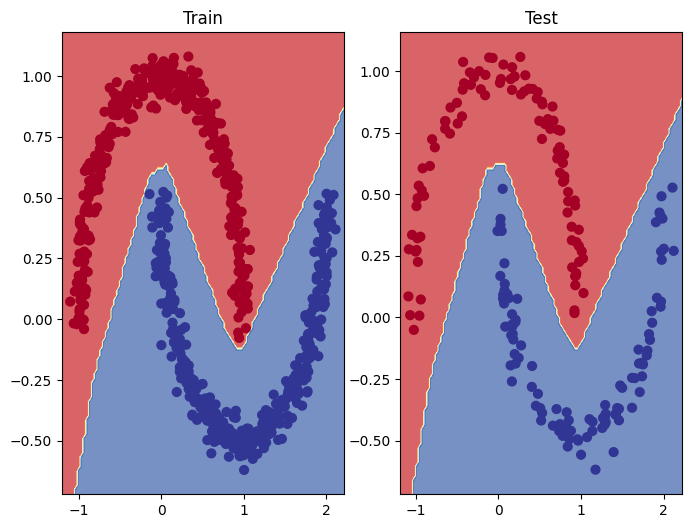

In [17]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model, X_test, y_test)

## 6. Replicate the Tanh (hyperbolic tangent) activation function in pure PyTorch.
  * Feel free to reference the [ML cheatsheet website](https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html#tanh) for the formula.

In [26]:
# Create a straight line tensor
dummy = torch.arange(-100,100,1)
dummy

tensor([-100,  -99,  -98,  -97,  -96,  -95,  -94,  -93,  -92,  -91,  -90,  -89,
         -88,  -87,  -86,  -85,  -84,  -83,  -82,  -81,  -80,  -79,  -78,  -77,
         -76,  -75,  -74,  -73,  -72,  -71,  -70,  -69,  -68,  -67,  -66,  -65,
         -64,  -63,  -62,  -61,  -60,  -59,  -58,  -57,  -56,  -55,  -54,  -53,
         -52,  -51,  -50,  -49,  -48,  -47,  -46,  -45,  -44,  -43,  -42,  -41,
         -40,  -39,  -38,  -37,  -36,  -35,  -34,  -33,  -32,  -31,  -30,  -29,
         -28,  -27,  -26,  -25,  -24,  -23,  -22,  -21,  -20,  -19,  -18,  -17,
         -16,  -15,  -14,  -13,  -12,  -11,  -10,   -9,   -8,   -7,   -6,   -5,
          -4,   -3,   -2,   -1,    0,    1,    2,    3,    4,    5,    6,    7,
           8,    9,   10,   11,   12,   13,   14,   15,   16,   17,   18,   19,
          20,   21,   22,   23,   24,   25,   26,   27,   28,   29,   30,   31,
          32,   33,   34,   35,   36,   37,   38,   39,   40,   41,   42,   43,
          44,   45,   46,   47,   48,   

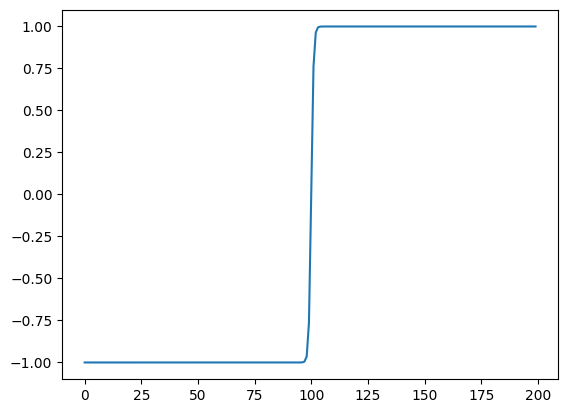

In [27]:
# Test torch.tanh() on the tensor and plot it
plt.plot((torch.tanh(dummy)));

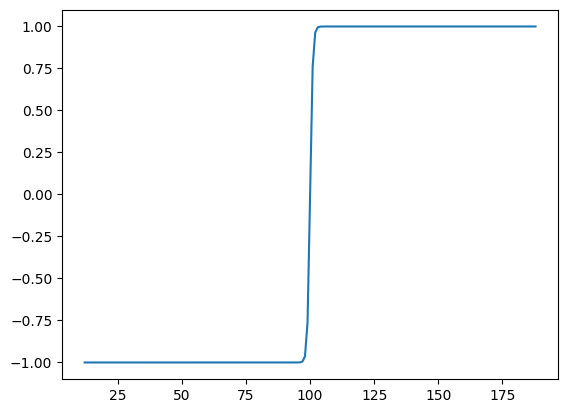

In [28]:
# Replicate torch.tanh() and plot it
def torch_tanh(z):
  pos_exp = torch.exp(z)
  neg_exp = torch.exp(-z)
  tanh = (pos_exp - neg_exp) / (pos_exp + neg_exp)
  return tanh
plt.plot(torch_tanh(dummy))

## 7. Create a multi-class dataset using the [spirals data creation function from CS231n](https://cs231n.github.io/neural-networks-case-study/) (see below for the code).
  * Split the data into training and test sets (80% train, 20% test) as well as turn it into PyTorch tensors.
  * Construct a model capable of fitting the data (you may need a combination of linear and non-linear layers).
  * Build a loss function and optimizer capable of handling multi-class data (optional extension: use the Adam optimizer instead of SGD, you may have to experiment with different values of the learning rate to get it working).
  * Make a training and testing loop for the multi-class data and train a model on it to reach over 95% testing accuracy (you can use any accuracy measuring function here that you like) - 1000 epochs should be plenty.
  * Plot the decision boundaries on the spirals dataset from your model predictions, the `plot_decision_boundary()` function should work for this dataset too.

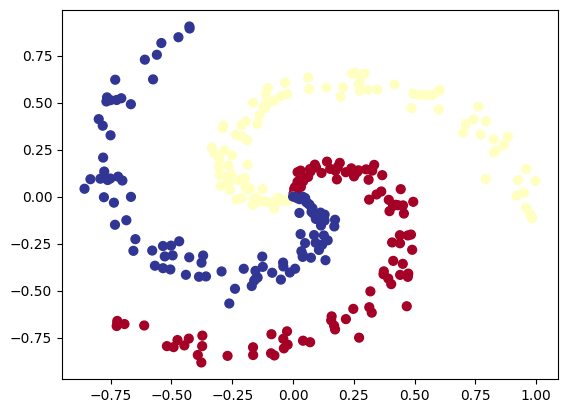

In [29]:
# Code for creating a spiral dataset from CS231n
import numpy as np
import matplotlib.pyplot as plt
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
plt.show()

In [22]:
# Turn data into tensors
import torch
X = torch.from_numpy(X).type(torch.float) # features as float32
y = torch.from_numpy(y).type(torch.LongTensor) # labels need to be of type long

# Create train and test splits
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [23]:
len(X_train),len(X_test),len(y_train),len(y_test)

(240, 60, 240, 60)

In [25]:
# Let's calculuate the accuracy for when we fit our model
!pip -q install torchmetrics # colab doesn't come with torchmetrics
from torchmetrics import Accuracy

acc_fn = Accuracy(task="multiclass", num_classes=3).to(device)
acc_fn

MulticlassAccuracy()

In [32]:
# Prepare device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

# Create model by subclassing nn.Module
class MultiClass(nn.Module):
  def __init__(self,input,output,hidden_units):
    super().__init__()
    self.layer1 = nn.Linear(in_features=input, out_features=hidden_units)
    self.layer2 = nn.Linear(in_features=hidden_units, out_features=hidden_units)
    self.layer3 = nn.Linear(in_features=hidden_units, out_features=output)
    self.relu = nn.ReLU()

  def forward(self, x):
    return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))



# Instantiate model and send it to device
model_2 = MultiClass(input=2, output=3, hidden_units=10).to(device)
model_2

MultiClass(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=3, bias=True)
  (relu): ReLU()
)

In [35]:
# Setup data to be device agnostic
X_train, X_test = X_train.to(device), X_test.to(device)
y_train, y_test = y_train.to(device), y_test.to(device)

# Print out first 10 untrained model outputs (forward pass)
print("Logits:")
## Your code here ##
print(model_2(X_train)[:10])
print("Pred probs:")
## Your code here ##
print(torch.softmax(model_2(X_train)[:10], dim=1))
print("Pred labels:")
## Your code here ##
print(torch.softmax(model_2(X_train)[:10], dim=1).argmax(dim=1))

Logits:
tensor([[-0.3621, -0.2138, -0.2310],
        [-0.3614, -0.2079, -0.2221],
        [-0.3471, -0.2292, -0.2296],
        [-0.2831, -0.2908, -0.2104],
        [-0.2988, -0.2787, -0.2243],
        [-0.3317, -0.2429, -0.2223],
        [-0.3408, -0.2369, -0.2274],
        [-0.3587, -0.2284, -0.2479],
        [-0.3358, -0.2374, -0.2223],
        [-0.2822, -0.2918, -0.2104]], device='cuda:0',
       grad_fn=<SliceBackward0>)
Pred probs:
tensor([[0.3030, 0.3515, 0.3455],
        [0.3016, 0.3517, 0.3467],
        [0.3077, 0.3462, 0.3461],
        [0.3260, 0.3235, 0.3506],
        [0.3228, 0.3294, 0.3478],
        [0.3117, 0.3406, 0.3477],
        [0.3096, 0.3435, 0.3468],
        [0.3071, 0.3498, 0.3431],
        [0.3102, 0.3423, 0.3475],
        [0.3263, 0.3232, 0.3506]], device='cuda:0', grad_fn=<SoftmaxBackward0>)
Pred labels:
tensor([1, 1, 1, 2, 2, 2, 2, 1, 2, 2], device='cuda:0')


In [38]:
# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.02)

In [40]:
# Build a training loop for the model
epochs = 1500
# Loop over data
for epoch in range(epochs):

  ## Training
  model_2.train()
  # 1. Forward pass
  y_logits = model_2(X_train)
  y_preds = torch.softmax(y_logits, dim=1).argmax(dim=1)

  # 2. Calculate the loss
  loss = loss_fn(y_logits, y_train)
  acc = acc_fn(y_preds, y_train)
  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ## Testing
  model_2.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_2(X_test)
    test_preds = torch.softmax(test_logits, dim=1).argmax(dim=1)
    # 2. Caculate loss and acc
    test_loss = loss_fn(test_logits, y_test)
    test_acc = acc_fn(test_preds, y_test)
  # Print out what's happening every 100 epochs
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.2f} Acc: {acc:.2f} | Test loss: {test_loss:.2f} Test acc: {test_acc:.2f}")


Epoch: 0 | Loss: 0.17 Acc: 0.95 | Test loss: 0.15 Test acc: 0.95
Epoch: 100 | Loss: 0.16 Acc: 0.95 | Test loss: 0.15 Test acc: 0.97
Epoch: 200 | Loss: 0.16 Acc: 0.95 | Test loss: 0.14 Test acc: 0.98
Epoch: 300 | Loss: 0.15 Acc: 0.95 | Test loss: 0.14 Test acc: 0.98
Epoch: 400 | Loss: 0.15 Acc: 0.95 | Test loss: 0.13 Test acc: 1.00
Epoch: 500 | Loss: 0.14 Acc: 0.95 | Test loss: 0.13 Test acc: 1.00
Epoch: 600 | Loss: 0.14 Acc: 0.96 | Test loss: 0.12 Test acc: 1.00
Epoch: 700 | Loss: 0.14 Acc: 0.96 | Test loss: 0.12 Test acc: 1.00
Epoch: 800 | Loss: 0.13 Acc: 0.96 | Test loss: 0.12 Test acc: 1.00
Epoch: 900 | Loss: 0.13 Acc: 0.96 | Test loss: 0.11 Test acc: 1.00
Epoch: 1000 | Loss: 0.13 Acc: 0.96 | Test loss: 0.11 Test acc: 1.00
Epoch: 1100 | Loss: 0.12 Acc: 0.96 | Test loss: 0.10 Test acc: 1.00
Epoch: 1200 | Loss: 0.12 Acc: 0.97 | Test loss: 0.10 Test acc: 1.00
Epoch: 1300 | Loss: 0.12 Acc: 0.96 | Test loss: 0.10 Test acc: 1.00
Epoch: 1400 | Loss: 0.12 Acc: 0.97 | Test loss: 0.10 Test ac

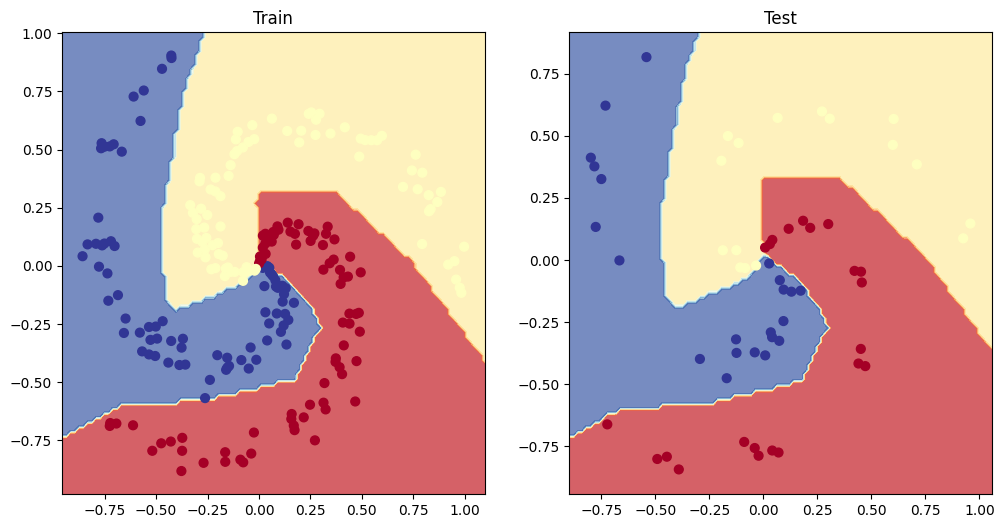

In [42]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_2, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_2, X_test, y_test)